In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("./data/london_weather.csv")

In [4]:
def linear_least_squares(x,y):
    n = len(x)
    Sx = sum(x)
    Sy = sum(y)
    Sxx = sum([i * i for i in x])
    Syy = sum([i * i for i in y])
    Sxy = sum([i * j for (i, j) in zip(x, y)])
    D = n * Sxx - Sx * Sx
    
    D_a = n * Sxy - Sx * Sy
    D_b = Sxx * Sy - Sx * Sxy
    return D_a/D, D_b/D

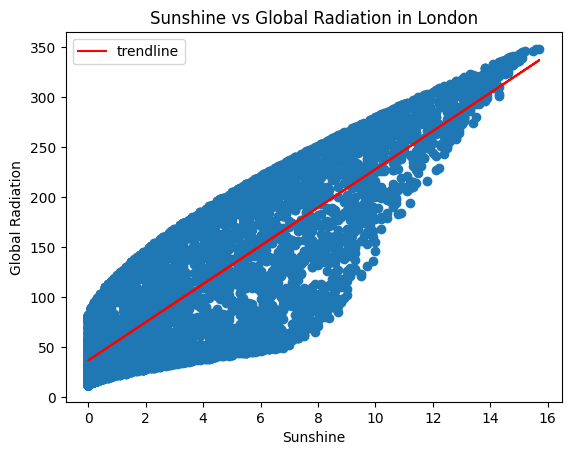

In [5]:
num_points = 5250
x = df["sunshine"].head(num_points)
y = df["global_radiation"].head(num_points)
plt.scatter(x, y)
a, b = linear_least_squares(x, y)
y_pred = [i * a + b for i in x]
plt.plot(x, y_pred, color='r', label='trendline')
plt.legend()
plt.title("Sunshine vs Global Radiation in London")
plt.xlabel("Sunshine")
plt.ylabel("Global Radiation")
plt.show()

It's difficult to have an accurate linear regression for this data since the same x value produces a lot of y values. However, overall, sunshine seems to directly correlate with global radiation. This could be because the global radiation column measures radiation from the sun.|

In [6]:
import warnings

#warning suppression because the dataset does not have fixed length dates
warnings.filterwarnings("ignore", message="Could not infer format")

#data retrieved from: https://www.kaggle.com/datasets/cvergnolle/gold-price-and-relevant-metrics
df = pd.read_csv("./data/Gold_Price_Data.csv")
df['Date'] = df['Date'].astype(str)
df['Date'] = pd.to_datetime(df['Date'], dayfirst = False, errors='coerce');
df['intdate'] = df['Date'].astype(int)

In [7]:
num_points = 657
x = df['intdate'].head(num_points)
y = df['Twenty Moving Average'].head(num_points)
x_date = df['Date'].head(num_points)
a, b = linear_least_squares(x, y)
y_pred = [i * a + b for i in x]

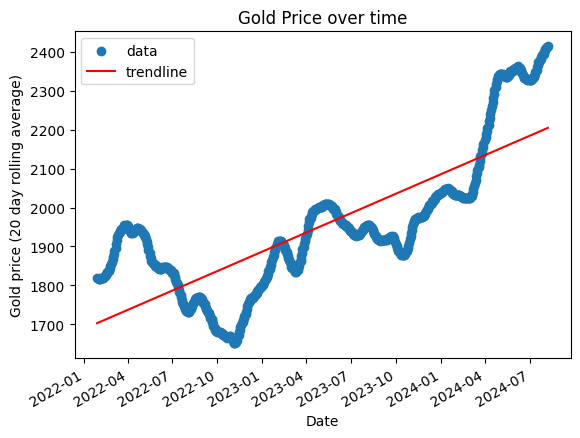

In [8]:
plt.scatter(x_date, y, label='data')
plt.plot(x_date, y_pred, color='r', label='trendline')

plt.title("Gold Price over time")
plt.xlabel('Date')
plt.gcf().autofmt_xdate()
plt.ylabel('Gold price (20 day rolling average)')

plt.legend()
plt.show()

The linear model clearly did not fit this data well. The price of gold fluctuated a lot, even with the rolling average, and the timespan is too large for a linear model to be accurate. However, the overall price still did increase over time, which the regression captured.